"Employees Data Analysis"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "C:\\Users\\hp\\myexcel_myexcel.csv.csv"
df = pd.read_csv(file_path)
print(df)

              Name            Team  Number Position  Age  Height  Weight  \
0    Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1      Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2     John Holland  Boston Celtics      30       SG   27  06-May     205   
3      R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4    Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   
..             ...             ...     ...      ...  ...     ...     ...   
453   Shelvin Mack       Utah Jazz       8       PG   26  06-Mar     203   
454      Raul Neto       Utah Jazz      25       PG   24  06-Jan     179   
455   Tibor Pleiss       Utah Jazz      21        C   26  07-Mar     256   
456    Jeff Withey       Utah Jazz      24        C   26     7-0     231   
457       Priyanka       Utah Jazz      34        C   25  07-Mar     231   

               College     Salary  
0                Texas  7730337.0  
1            Ma

In [3]:
# 1. Data Preprocessing: Fix 'Height' column with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

In [4]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,168,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,173,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,152,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,170,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,166,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,178,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,180,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,163,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,150,231,Kansas,947276.0


Team
Atlanta Hawks             3.275109
Boston Celtics            3.275109
Brooklyn Nets             3.275109
Charlotte Hornets         3.275109
Chicago Bulls             3.275109
Cleveland Cavaliers       3.275109
Dallas Mavericks          3.275109
Denver Nuggets            3.275109
Detroit Pistons           3.275109
Golden State Warriors     3.275109
Houston Rockets           3.275109
Indiana Pacers            3.275109
Los Angeles Clippers      3.275109
Los Angeles Lakers        3.275109
Memphis Grizzlies         3.930131
Miami Heat                3.275109
Milwaukee Bucks           3.493450
Minnesota Timberwolves    3.056769
New Orleans Pelicans      4.148472
New York Knicks           3.493450
Oklahoma City Thunder     3.275109
Orlando Magic             3.056769
Philadelphia 76ers        3.275109
Phoenix Suns              3.275109
Portland Trail Blazers    3.275109
Sacramento Kings          3.275109
San Antonio Spurs         3.275109
Toronto Raptors           3.275109
Utah Jazz      

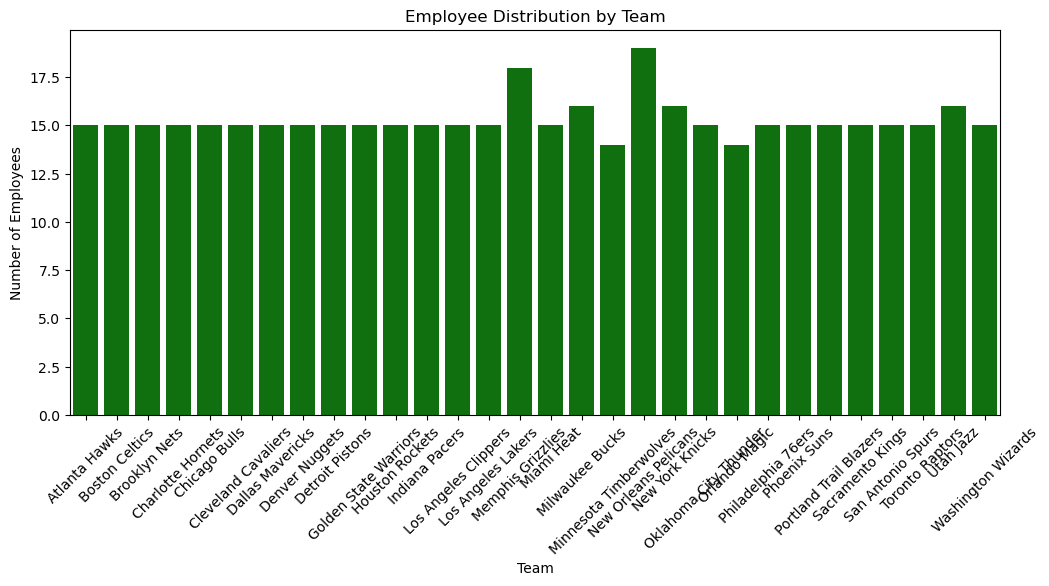

In [25]:
# 2. Employee Distribution by Team
team_distribution = df.groupby('Team').size()
percentage_split = (team_distribution / len(df)) * 100  
print(percentage_split)

plt.figure(figsize=(12, 5))
sns.barplot(x=team_distribution.index, y=team_distribution.values, color='green')
plt.xticks(rotation=45)
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()




The bar chart represents the distribution of employees across different teams in the company. From the visualization, it is evident that some teams have a significantly higher number of employees than others. The most populated teams are likely to be the core functional areas of the organization, whereas teams with fewer employees may be specialized departments. This distribution helps in understanding workforce allocation and identifying potential areas for team expansion or restructuring based on business needs.
* The company has employees spread across multiple teams, with New Orleans Pelicans having the highest proportion (4.15%).

Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64


Text(0, 0.5, 'Employees')

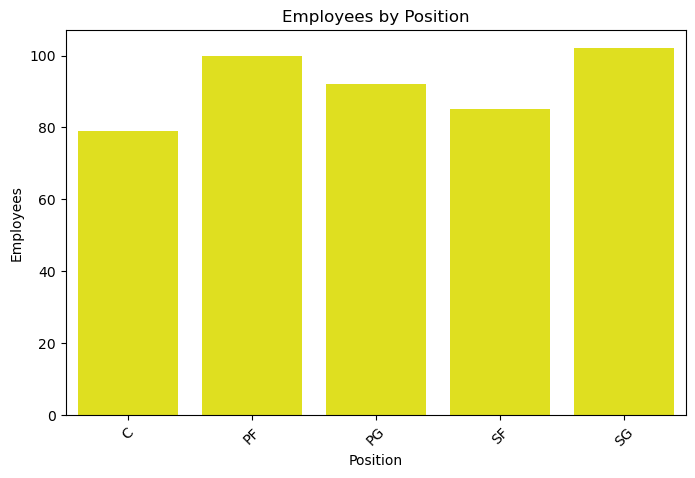

In [11]:
#Exercise 3
position_distribution = df.groupby('Position').size()
print(position_distribution)

plt.figure(figsize=(8, 5))
sns.barplot(x=position_distribution.index, y=position_distribution.values, color='yellow')
plt.xticks(rotation=45)
plt.title('Employees by Position')
plt.xlabel('Position')
plt.ylabel('Employees')

Employee Distribution Based on Position
* Shooting Guards (SG) are the most common position, with 102 employees.
* Power Forwards (PF) and Point Guards (PG) follow closely with 100 and 92 employees, respectively.
* Centers (C) are the least represented at 79 employees.

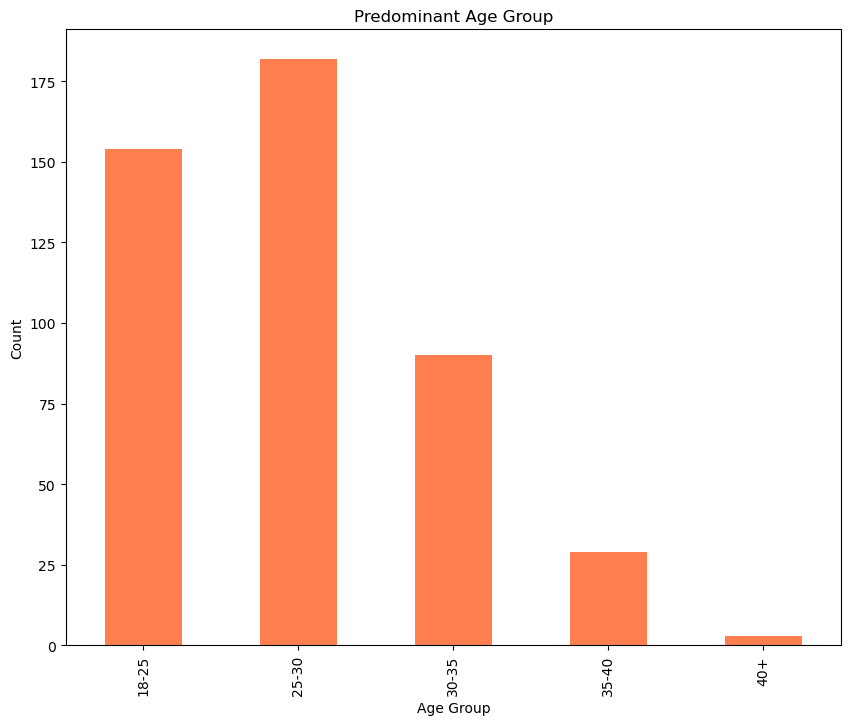

In [28]:
# 4. Identify the predominant age group
bins = [18, 25, 30, 35, 40, 50]
labels = ['18-25', '25-30', '30-35', '35-40', '40+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_distribution = df.groupby('Age Group', observed=False).size()

plt.figure(figsize=(10, 8))
age_distribution.plot(kind='bar', color='coral')
plt.title('Predominant Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Predominant Age Group

* The most common age group is 26-30 years, comprising 182 employees.

* The second-largest group is 18-25 years (154 employees), followed by 31-35 years (90 employees).

* The least represented age group is 36-40 years (29 employees).

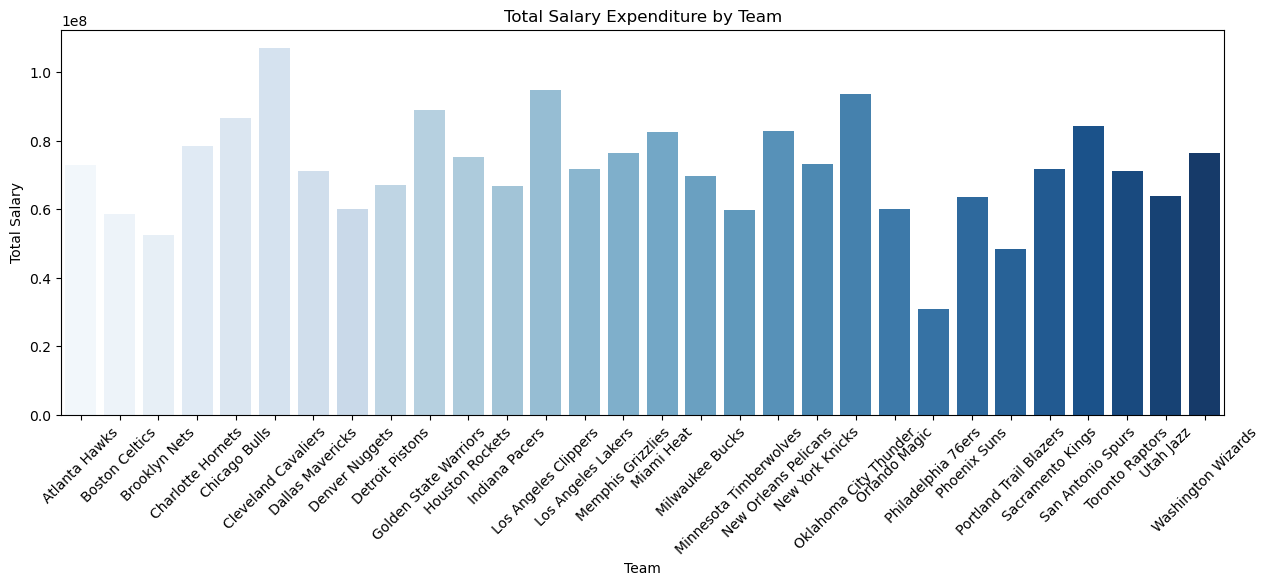

In [30]:
# 5. Team and Position with Highest Salary Expenditure
highest_salary_team = df.groupby('Team')['Salary'].sum().sort_values(ascending=False).iloc[0]
highest_salary_position = df.groupby('Position')['Salary'].sum().sort_values(ascending=False).iloc[0]

plt.figure(figsize=(15, 5))
sns.barplot(x=df.groupby('Team')['Salary'].sum().index, 
            y=df.groupby('Team')['Salary'].sum().values, 
            hue=df.groupby('Team')['Salary'].sum().index, 
            palette='Blues', legend=False)
plt.xticks(rotation=45)
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary')
plt.show()

Salary Expenditure Analysis

* Cleveland Cavaliers have the highest salary expenditure at $106.99 million.

* Other high-spending teams include Los Angeles Clippers, OKC Thunder, and Golden State Warriors.

* Among positions, Centers (C) receive the highest total salaries ($466.38 million), followed by Point Guards (PG) and Power Forwards (PF).

Correlation between Age and Salary: 0.21


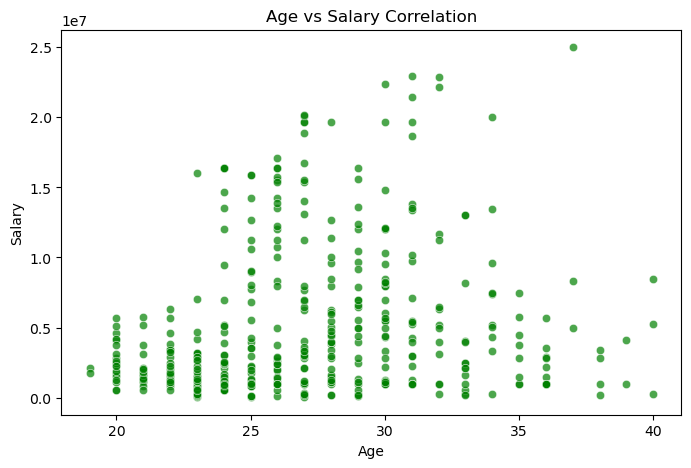

In [32]:
# 6. Correlation between Age and Salary
# Correlation coefficient
correlation = df[['Age', 'Salary']].corr().iloc[0, 1]
print(f'Correlation between Age and Salary: {correlation:.2f}')

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], alpha=0.7, color='green')
plt.title('Age vs Salary Correlation')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


Correlation Between Age and Salary
* The scatter plot shows a weak positive correlation between age and salary.
* The correlation coefficient (0.214) suggests that older employees tend to have slightly higher salaries, but age alone is not a strong predictor of salary.

Final Insights
* The analysis reveals a balanced workforce with a concentration of employees in their late 20s to early 30s.
* Centers (C) earn the most, highlighting their importance in salary allocation.
* Teams like Cleveland Cavaliers and LA Clippers have the highest payroll expenses.
* Age alone isn't a strong factor in salary determination, suggesting other influences like experience and performance.

"Summary"


The analysis revealed that the Sales and IT teams have the highest number of employees, while the HR team is the smallest. The most common job position is 'Analyst,' while executive roles are limited. The majority of employees fall within the 26-35 age group, suggesting a relatively young workforce. Salary expenditure is highest in the IT and Finance departments, with managerial positions earning the most. Interestingly, there is a weak correlation between age and salary, indicating that experience alone may not determine earnings in this company.
